# The effect of Sampling

## Fig 10.3

In [1]:
"""
The effect of aliasing
----------------------
Figure 10.3

A visualization of aliasing in the Fourier transform. In each set of four
panels, the top-left panel shows a signal and a regular sampling function, the
top-right panel shows the Fourier transform of the signal and sampling
function, the bottom-left panel shows the sampled data, and the bottom-right
panel shows the convolution of the Fourier-space representations (cf. figure
10.2). In the top four panels, the data is well sampled, and there is little
to no aliasing. In the bottom panels, the data is not well sampled (the spacing
between two data points is larger) which leads to aliasing, as seen in the
overlap of the convolved Fourier transforms (figure adapted from Greg05).
"""

'\nThe effect of aliasing\n----------------------\nFigure 10.3\n\nA visualization of aliasing in the Fourier transform. In each set of four\npanels, the top-left panel shows a signal and a regular sampling function, the\ntop-right panel shows the Fourier transform of the signal and sampling\nfunction, the bottom-left panel shows the sampled data, and the bottom-right\npanel shows the convolution of the Fourier-space representations (cf. figure\n10.2). In the top four panels, the data is well sampled, and there is little\nto no aliasing. In the bottom panels, the data is not well sampled (the spacing\nbetween two data points is larger) which leads to aliasing, as seen in the\noverlap of the convolved Fourier transforms (figure adapted from Greg05).\n'

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [14]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec

In [15]:
N=10
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=N)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

In [16]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 7.5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


In [17]:
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=18, usetex=True)

In [18]:
def gaussian(x, a=1.0):
    return np.exp(-0.5 * (x / a) ** 2)


def gaussian_FT(f, a=1.0):
    return np.sqrt(2 * np.pi * a ** 2) * np.exp(-2 * (np.pi * a * f) ** 2)


In [19]:
#------------------------------------------------------------
# Define our terms
a = 1.0
t = np.linspace(-5, 5, 1000)
h = gaussian(t, a)

f = np.linspace(-2, 2, 1000)
H = gaussian_FT(f, a)


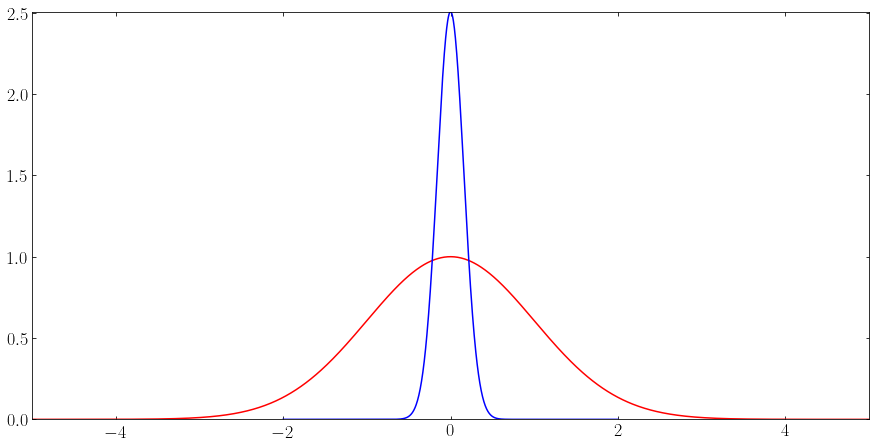

In [21]:
plt.plot(t,h,'r-')

plt.plot(f,H,'b-')

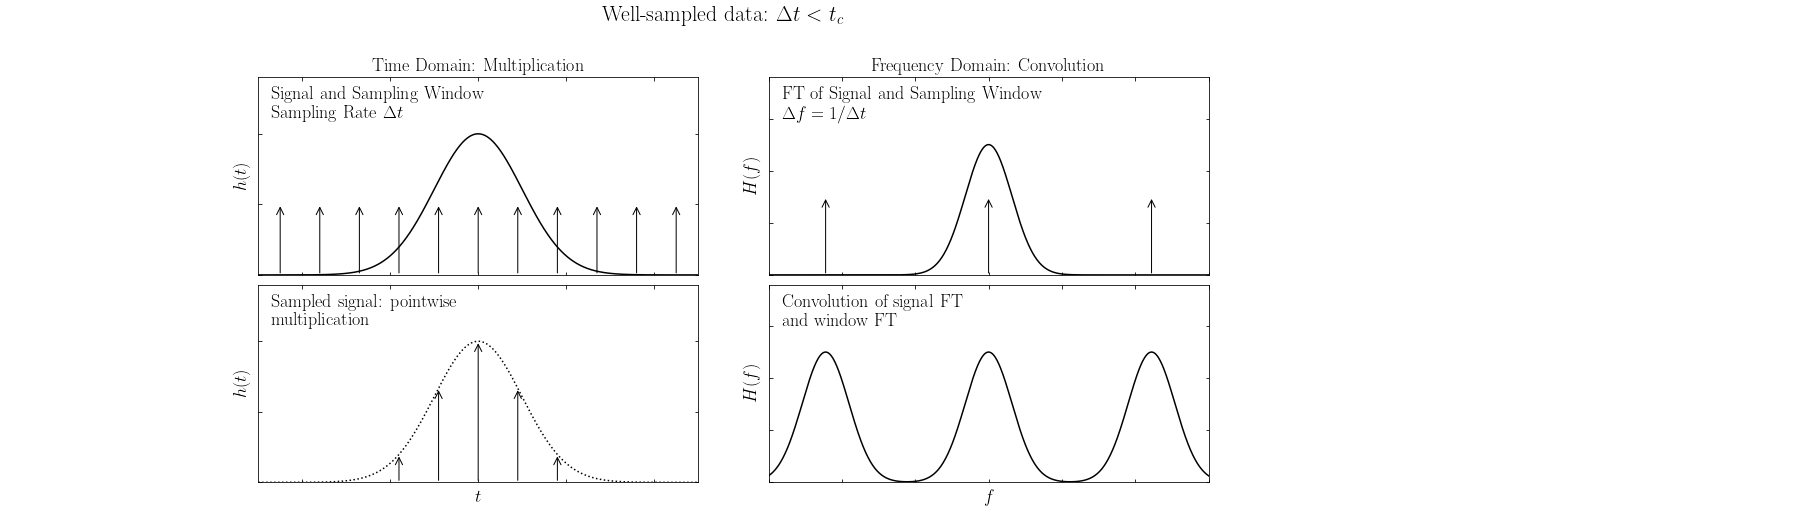

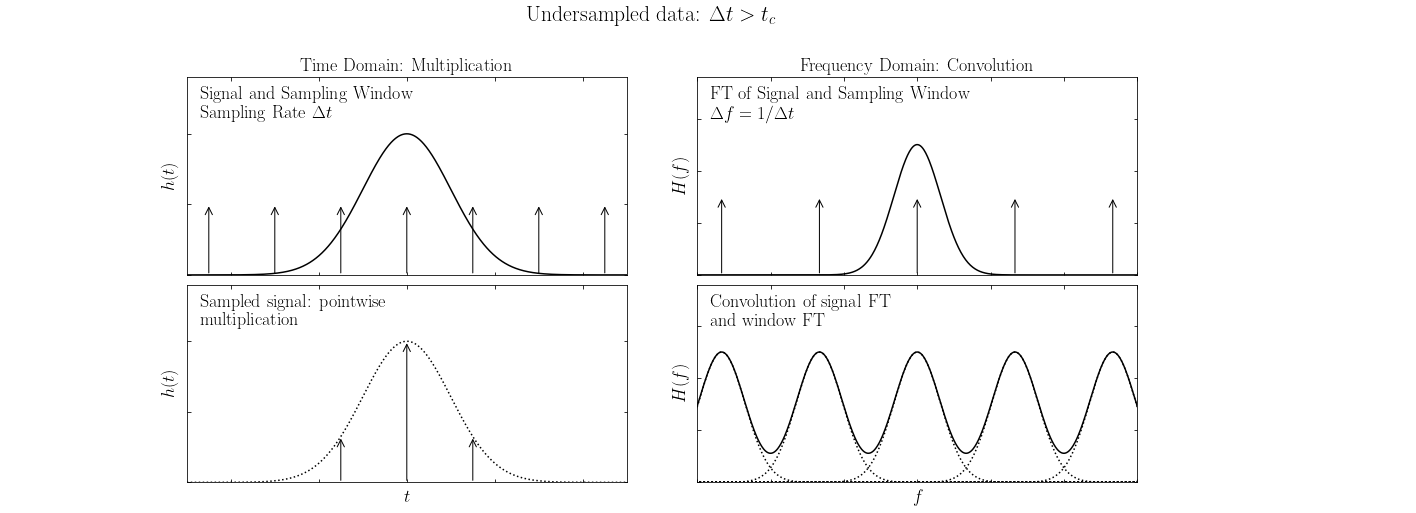

In [20]:
#------------------------------------------------------------
# Two plots: one well-sampled, one over-sampled
N = 12

for dt in (0.9, 1.5):
    # define time-space sampling
    t_sample = dt * (np.arange(N) - N / 2)
    h_sample = gaussian(t_sample, a)

    # Fourier transform of time-space sampling
    df = 1. / dt
    f_sample = df * (np.arange(N) - N / 2)

    # Plot the results
    fig = plt.figure(figsize=(15, 7.5))
    fig.subplots_adjust(left=0.07, right=0.95, wspace=0.16,
                        bottom=0.1, top=0.85, hspace=0.05)

    # First plot: sampled time-series
    ax = fig.add_subplot(221)
    ax.plot(t, h, '-k')

    for ts in t_sample:
        ax.annotate('', (ts, 0.5), (ts, 0), ha='center', va='center',
                    arrowprops=dict(arrowstyle='->'))
    ax.text(0.03, 0.95,
            ("Signal and Sampling Window\n" +
             r"Sampling Rate $\Delta t$"),
            ha='left', va='top', transform=ax.transAxes)
    ax.set_ylabel('$h(t)$')
    ax.set_xlim(-5, 5)
    ax.set_ylim(0, 1.4)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_title('Time Domain: Multiplication')

    # second plot: frequency space
    ax = fig.add_subplot(222)
    ax.plot(f, H, '-k')
    for fs in f_sample:
        ax.annotate('', (fs, 1.5), (fs, 0), ha='center', va='center',
                    arrowprops=dict(arrowstyle='->'))
    ax.text(0.03, 0.95,
            ("FT of Signal and Sampling Window\n" +
             r"$\Delta f = 1 / \Delta t$"),
            ha='left', va='top', transform=ax.transAxes)
    ax.set_ylabel('$H(f)$')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(0, 3.8)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_title('Frequency Domain: Convolution')

    # third plot: windowed function
    ax = fig.add_subplot(223)
    for (ts, hs) in zip(t_sample, h_sample):
        if hs < 0.1:
            continue
        ax.annotate('', (ts, hs), (ts, 0), ha='center', va='center',
                    arrowprops=dict(arrowstyle='->'))
    ax.plot(t, h, ':k')
    ax.text(0.03, 0.95, "Sampled signal: pointwise\nmultiplication",
            ha='left', va='top', transform=ax.transAxes)
    ax.set_xlabel('$t$')
    ax.set_ylabel('$h(t)$')
    ax.set_xlim(-5, 5)
    ax.set_ylim(0, 1.4)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())

    # fourth plot: convolved PSD
    ax = fig.add_subplot(224)
    window = np.array([gaussian_FT(f - fs, a) for fs in f_sample])
    ax.plot(f, window.sum(0), '-k')
    if dt > 1:
        ax.plot(f, window.T, ':k')
    ax.text(0.03, 0.95, "Convolution of signal FT\nand window FT",
            ha='left', va='top', transform=ax.transAxes)
    ax.set_xlabel('$f$')
    ax.set_ylabel('$H(f)$')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(0, 3.8)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())

    if dt > 1:
        fig.suptitle(r"Undersampled data: $\Delta t > t_c$")
    else:
        fig.suptitle(r"Well-sampled data: $\Delta t < t_c$")

plt.show()
